# Model Training
- implements regression models and evaluates using cross-validation

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Load processed data
df = pd.read_csv('../data/processed_train.csv')
print(f"Shape: {df.shape}")


Shape: (1458, 230)


## Feature Matrix and Target Variable

In [2]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


## Define RMSE Scoring Function

In [3]:
from sklearn.metrics import mean_squared_error

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse


## Train Base Models and compare RMSE

In [4]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(), #LR with L2 regularization (penalty on sum of absolute weights)
    "Lasso": Lasso(), #LR with L1 regularization (penalty on sum of squared rates)
    "ElasticNet": ElasticNet(), #Mix of Ridge and Lasso
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    score = rmse_cv(model)
    results[name] = score.mean()
    print(f"{name}: RMSE = {score.mean():.4f}")


Linear Regression: RMSE = 0.1215
Ridge: RMSE = 0.1150
Lasso: RMSE = 0.2357
ElasticNet: RMSE = 0.2314
Decision Tree: RMSE = 0.2010
Random Forest: RMSE = 0.1390
Gradient Boosting: RMSE = 0.1230


## Visualizing Model Performance

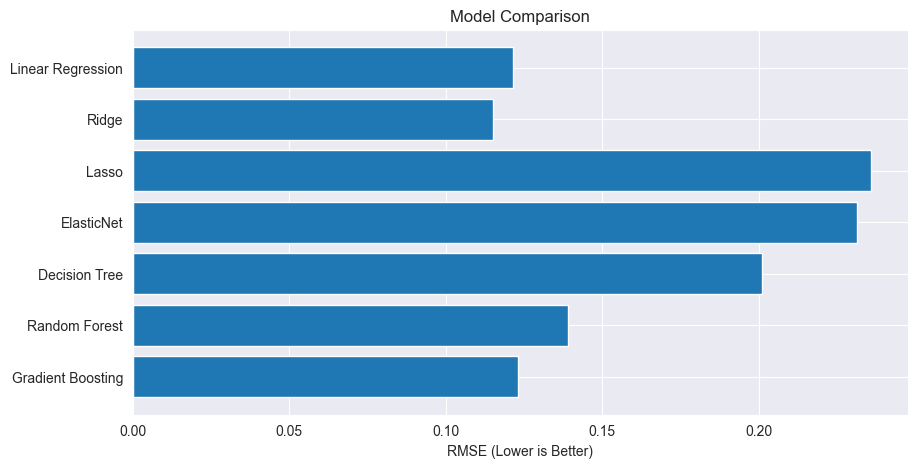

In [5]:
import matplotlib.pyplot as plt

names = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(10, 5))
plt.barh(names, scores)
plt.xlabel("RMSE (Lower is Better)")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()


## Summary
 - Several Baseline models trained and evaluated for RMSE
 - Will use Ridge, Gradient Boosting, and RandomForest for tuning
 - next will hyperparameter tune for best models